# Example to Identify Outliers in Raw Neutron Signal

The example uses a dataset collected from a Lithium foil detector that experienced sporadic peaks of neutron counts due to electronic malfunctioning and impacts on the device itself (e.g. strong winds, heavy rainfall, hail). The device also had sporadic power outages, which means that neutron counts were not integrated over 3600 seconds, thus saving a markedly lower neutron count for the hour.

The following code illustrates the detection and removal of these outliers using the `CRNPy` library

In [5]:
import pandas as pd
from crnpy import crnpy
import matplotlib.pyplot as plt

In [9]:
# Load file from Radiation detection technologies
filename = 'rdt_stationary_lifoil/rdt.csv'
variables = ['timestamp','pressure','RH', 'T','DP','BattVolt','counts_1','counts_2','counts_3','counts_total'];
df = pd.read_csv(filename,names=variables)

cols_counts = ['counts_1','counts_2','counts_3']


In [12]:
df = df.pipe(crnpy.format_dates, format='%m/%d/%Y %H:%M')

Adding missing date: 2020-04-29 15:00:00
Adding missing date: 2020-04-29 17:00:00
Adding missing date: 2020-04-29 19:00:00
Adding missing date: 2020-04-29 21:00:00
Adding missing date: 2020-04-29 23:00:00
Adding missing date: 2020-04-30 01:00:00
Adding missing date: 2020-04-30 03:00:00
Adding missing date: 2020-04-30 05:00:00
Adding missing date: 2020-04-30 07:00:00
Adding missing date: 2020-04-30 09:00:00
Adding missing date: 2020-04-30 11:00:00
Adding missing date: 2020-04-30 13:00:00
Adding missing date: 2020-04-30 15:00:00
Adding missing date: 2020-04-30 17:00:00


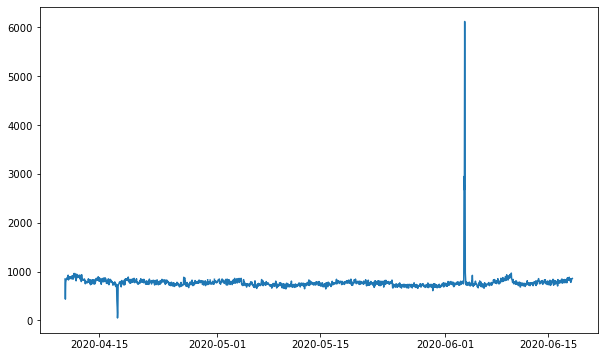

In [13]:
# Plot neutron counts BEFORE outlier removal for detector #1
plt.figure(figsize=(10,6))
plt.plot(df['timestamp'],df['counts_1'])
plt.show()

In [14]:
# Remove outliers
df = df.pipe(crnpy.is_outlier, cols_counts)

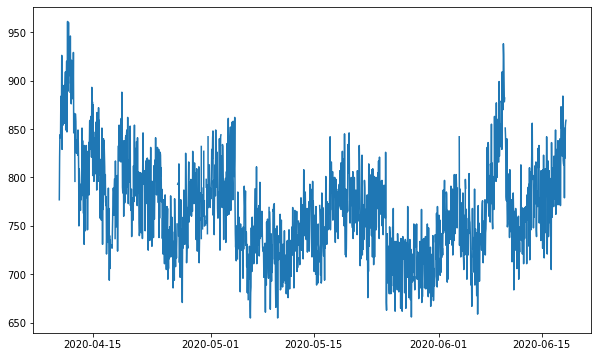

In [15]:
# Plot neutron counts AFTER outlier removal for detector #1
plt.figure(figsize=(10,6))
plt.plot(df['timestamp'],df['counts_1'])
plt.show()